<h3>Import Packages</h3>

In [3]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, Nadam, Adamax
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix
import os


<h3>Load VGG16 Model with basic layers</h3>

In [4]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)  # Binary classification

model = Model(inputs=base_model.input, outputs=x)
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


<h3>Sample Images from DataSet with Labels</h3>

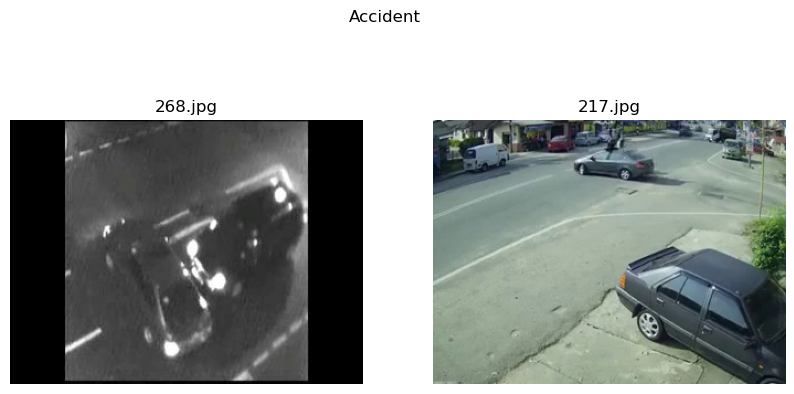

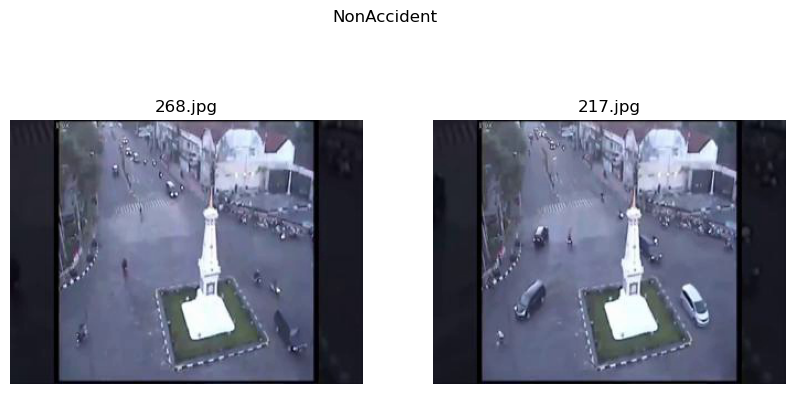

In [2]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define the path to the folder containing images
folder_path = ['E://MS_USD//Course 2_AAI-501//FinalProject//Train//Accident', 'E://MS_USD//Course 2_AAI-501//FinalProject//Train//NonAccident']
files=["268.jpg","217.jpg"]

for i in folder_path:
    # List all files in the folder
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(i.split("//")[-1])
    count=0
    # Read and display images
    for j in files:
        image_path = os.path.join(i, j)
        image = Image.open(image_path)
        # Display the image using Matplotlib
        axs[count].imshow(image)
        axs[count].set_title(j)
        axs[count].axis('off')
        count+=1

    plt.show()

<h3>Creation of Train, test and validation generators for model training</h3>

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, )

train_generator = train_datagen.flow_from_directory(
    'E://MS_USD//Course 2_AAI-501//FinalProject//Train',  # Replace with the path to your train folder
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 12966 images belonging to 2 classes.


In [29]:
train_generator.class_indices

{'Accident': 0, 'NonAccident': 1}

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    'E://MS_USD//Course 2_AAI-501//FinalProject//Validation',  # Replace with the path to your validation folder
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 4322 images belonging to 2 classes.


In [51]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'E://MS_USD//Course 2_AAI-501//FinalProject//Test',  # Replace with the path to your validation folder
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 4323 images belonging to 2 classes.


<h3>Model Checkpoints for storing model as .keras file and for contnous monitoring of the model after every epoch</h3>

In [ ]:
checkpoint_callback = ModelCheckpoint(
    'E://MS_USD//Course 2_AAI-501//FinalProject//RmsPropModel//vgg16Model_checkpoint_{epoch:02d}_val_acc_{val_accuracy:.2f}.keras',
    save_best_only=False,
    save_weights_only=False,
    mode='auto'
)
early_stopping = EarlyStopping(
monitor='val_accuracy', # Monitor validation accuracy
min_delta=0.001, # Minimum change to qualify as an improvement
patience=10, # Number of epochs to wait for an improvement
verbose=1,
mode='max', # Stop when the quantity monitored has stopped increasing
restore_best_weights=True # Restore the weights of the best epoch
)


In [22]:
def trainModel(model):
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // train_generator.batch_size,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // validation_generator.batch_size,
        callbacks=[early_stopping, checkpoint_callback]
        )
    return history


In [ ]:
model_e = load_model('E://MS_USD//Course 2_AAI-501//FinalProject//vgg16Model_checkpoint_05_val_acc_0.29.keras')


<h3>Model trained for 30 Epochs</h3>

In [24]:
trainedHistory = trainModel(model_e)

Epoch 1/30
405/405 ━━━━━━━━━━━━━━━━━━━━ 2995s 7s/step - accuracy: 0.9626 - loss: 0.1066 - val_accuracy: 0.2993 - val_loss: 3.4308
Epoch 2/30
405/405 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 1.0000 - loss: 0.0412 - val_accuracy: 0.0000e+00 - val_loss: 7.1990
Epoch 3/30
405/405 ━━━━━━━━━━━━━━━━━━━━ 2988s 7s/step - accuracy: 0.9655 - loss: 0.0960 - val_accuracy: 0.3238 - val_loss: 4.2101
Epoch 4/30
405/405 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.9375 - loss: 0.1357 - val_accuracy: 0.5000 - val_loss: 1.9148
Epoch 5/30
405/405 ━━━━━━━━━━━━━━━━━━━━ 2918s 7s/step - accuracy: 0.9716 - loss: 0.0833 - val_accuracy: 0.3037 - val_loss: 4.4894
Epoch 6/30
405/405 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 1.0000 - loss: 0.0279 - val_accuracy: 0.0000e+00 - val_loss: 6.4750
Epoch 7/30
405/405 ━━━━━━━━━━━━━━━━━━━━ 2866s 7s/step - accuracy: 0.9704 - loss: 0.0839 - val_accuracy: 0.3266 - val_loss: 4.2939
Epoch 8/30
405/405 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9688 - loss: 0.079

In [54]:
def validationReport(model):
    y_pred = model.predict(validation_generator) 
    y_pred_classes = (y_pred > 0.5).astype("int32") # For binary classification 
    y_true = validation_generator.classes # Generate classification report 
    print("Validation Generator")
    print(classification_report(y_true, y_pred_classes)) # Print confusion matrix 
    print(confusion_matrix(y_true, y_pred_classes))

def testReport(model):
    y_pred = model.predict(test_generator)
    y_pred_classes = (y_pred > 0.5).astype("int32") # For binary classification 
    y_true = test_generator.classes # Generate classification report 
    print("Test Generator")
    print(classification_report(y_true, y_pred_classes)) # Print confusion matrix 
    print(confusion_matrix(y_true, y_pred_classes))

<h3>Model Validation(Confusion Matrix, Accuracy, Preision etc.) by executing the model for different models at different epochs</h3>

In [55]:
model_valAcc_50 = load_model('E:\\MS_USD\\Course 2_AAI-501\\FinalProject\\NewModels\\vgg16Model_checkpoint_12_val_acc_0.50.keras')
validationReport(model_valAcc_50)
print("------------")
testReport(model_valAcc_50)

136/136 ━━━━━━━━━━━━━━━━━━━━ 1444s 10s/step
Validation Generator
              precision    recall  f1-score   support

           0       0.28      0.78      0.42      1238
           1       0.70      0.21      0.33      3084

    accuracy                           0.38      4322
   macro avg       0.49      0.50      0.37      4322
weighted avg       0.58      0.38      0.35      4322

[[ 961  277]
 [2423  661]]
------------


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


136/136 ━━━━━━━━━━━━━━━━━━━━ 1438s 11s/step
Test Generator
              precision    recall  f1-score   support

           0       0.28      0.78      0.42      1239
           1       0.70      0.21      0.32      3084

    accuracy                           0.37      4323
   macro avg       0.49      0.50      0.37      4323
weighted avg       0.58      0.37      0.35      4323

[[ 969  270]
 [2439  645]]


In [56]:
model_valAcc_34 = load_model('E:\\MS_USD\\Course 2_AAI-501\\FinalProject\\NewModels\\vgg16Model_checkpoint_23_val_acc_0.34.keras')
validationReport(model_valAcc_34)
print("------------")
testReport(model_valAcc_34)

136/136 ━━━━━━━━━━━━━━━━━━━━ 1376s 10s/step
Validation Generator
              precision    recall  f1-score   support

           0       0.29      0.85      0.43      1238
           1       0.72      0.16      0.26      3084

    accuracy                           0.36      4322
   macro avg       0.51      0.50      0.35      4322
weighted avg       0.60      0.36      0.31      4322

[[1047  191]
 [2584  500]]
------------
136/136 ━━━━━━━━━━━━━━━━━━━━ 1402s 10s/step
Test Generator
              precision    recall  f1-score   support

           0       0.28      0.85      0.43      1239
           1       0.70      0.14      0.24      3084

    accuracy                           0.34      4323
   macro avg       0.49      0.50      0.33      4323
weighted avg       0.58      0.34      0.29      4323

[[1052  187]
 [2646  438]]


In [57]:
model_valAcc_40E = load_model('E:\\MS_USD\\Course 2_AAI-501\\FinalProject\\NewModels\\vgg16Model_checkpoint_24_val_acc_0.00.keras')
validationReport(model_valAcc_40E)
print("------------")
testReport(model_valAcc_40E)

136/136 ━━━━━━━━━━━━━━━━━━━━ 1368s 10s/step
Validation Generator
              precision    recall  f1-score   support

           0       0.29      0.84      0.43      1238
           1       0.71      0.16      0.26      3084

    accuracy                           0.35      4322
   macro avg       0.50      0.50      0.34      4322
weighted avg       0.59      0.35      0.31      4322

[[1037  201]
 [2595  489]]
------------
136/136 ━━━━━━━━━━━━━━━━━━━━ 1390s 10s/step
Test Generator
              precision    recall  f1-score   support

           0       0.28      0.85      0.43      1239
           1       0.70      0.14      0.23      3084

    accuracy                           0.34      4323
   macro avg       0.49      0.50      0.33      4323
weighted avg       0.58      0.34      0.29      4323

[[1056  183]
 [2654  430]]


In [5]:
bestModel = load_model('E:\\MS_USD\\Course 2_AAI-501\\FinalProject\\AdamModels\\vgg16Model_checkpoint_12_val_acc_0.50.keras')

<h3>Best Model of all Summary</h3>

In [12]:
bestModel.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,252,933 (203.14 MB)

 Trainable params: 12,846,081 (49.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 25,692,164 (98.01 MB)

<h3>Model Predcition on Test Dataset</h3>

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step
Accident


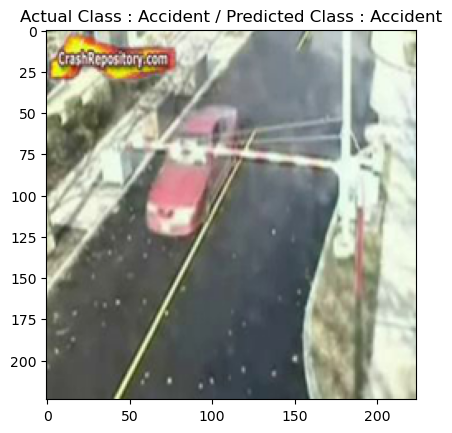

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
Non Accident


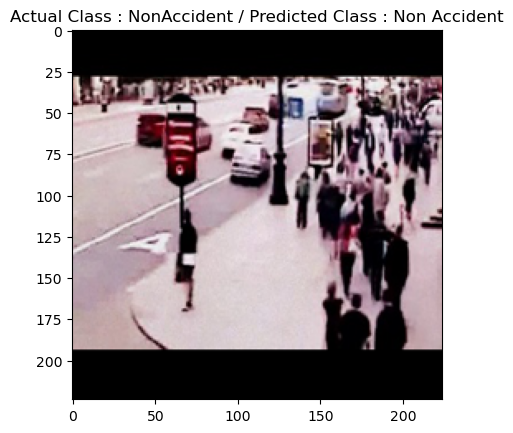

In [11]:
from PIL import Image
import numpy as np

def preprocess_image(image_path, target_size):
    # Load the image
    image = Image.open(image_path)
    # Resize the image to the target size
    image = image.resize(target_size)
    # Convert the image to a NumPy array
    image_array = np.array(image)
    # Normalize the image data to 0-1 range
    image_array = image_array / 255.0
    # Expand dimensions to match the model input
    image_array = np.expand_dims(image_array, axis=0)
    return image_array, image

# Define the path to the image and the target size
image_path = ['E://MS_USD//Course 2_AAI-501//FinalProject//Test//Accident//81.jpg', 'E://MS_USD//Course 2_AAI-501//FinalProject//Test//NonAccident//79.jpg']
target_size = (224, 224)  # Example target size, adjust based on your model's input
for i in image_path:
    # Preprocess the image
    preprocessed_image, image = preprocess_image(i, target_size)
    
    predictions = bestModel.predict(preprocessed_image)
    className = "Accident" if predictions<0.5 else "Non Accident"  
    print(className)
    plt.imshow(image)
    plt.title(f"Actual Class : {i.split("//")[-2]} / Predicted Class : {className}")
    plt.show()


<center><h2>Inference</h2></center>
<h4>Summary</h4>
<ol>
<li>Train dataset contains 12966 images</li>
<li>Validation dataset contains 4322 images</li>
<li>Test dataset contains 4323 images</li>
<li>VGGnet16 model is being used without extra convolution and max pooling layers</li>
<li>Optimizer used is Adam</li>
<li>Learning parameter (alpha) 0.0001 </li>
<li>The best model had a validation accuracy of 37% and test accuracy of 38%</li>
</ol>
<h4>Conculsion</h4>
<p>The dataset which had both accident and non accident images are not segregated properly in source dataset. Data cleaning is mandatory and the source dataset with close to 20000 images needs to be labelled appropriately for better training of the model. It is evident with manual validation that certain non accident images are places in accident folder, but cleaning and preprocessing of less weightage for the current module as given in the final project description.</p>